## Question 1
The difference between the standard error of the mean (SEM) and the standard deviation (STD) of the original data is that the STD just indicates how much each data point differs from the mean, which we can call the spread of the dataset about the mean. SEM is similar to STD in that it uses the mean from the original dataset to compare it to something. However, instead of calulating the variability of data points within the original dataset, SEM calculates the variability of the means from sample datasets to the original dataset's mean. An example is to think of these sample datasets to be some bootstrapped datasets, then the SEM would be calculating how much the means from these datasets differ from the actual mean of the original dataset. This will tell you how much the mean changes with each repeat of the experiment, and you can see if results are consistent from this.

While the STD captures the variability of data points compared to the mean of **one** dataset (the original), SEM captures the variability of the means of **different versions of the original dataset** compared to the mean of the original dataset.

## Question 2
To start, the confidence interval is calculated by taking the sample mean +- (Z-score * SEM) where the SEM is the the sample STD divided by the square root of the sample size. Now to calculate the 95% confidence interval, we take the Z-score that closely corresponds to a 95%, input the sample means and the calculated SEM and you will get the 95% confidence interval using the SEM. We know this covers 95% of the *bootstrapped sample means* since the SEM contains the bootstrapped sample means. 

To break this down, the sample mean represents the average of the sample data, which is the center point for your confidence interval to vary around. The Z-score describes how far away from the mean you need to go to reach a certain percentage of the data in a normal distribution. There is a list of Z-scores with the percentage it captures online, so if you want a 95% then you'd look for the numbers closest to 95% and look for it's corresponding Z-value which is between 0 and 3.99 (in this case the Z-score that's closest to 95% is 1.96). SEM tells you how much the sample mean is expected to vary from each repeat of the sample. Z * SEM represents the margin of error with the +- creating the upper and lower bounds for the interval.

## Question 3
Using a percentile-based method, you can calculate the 95% confidence interval using bootstrapped means and without it's STD to estimate the SEM. First, you must resample your data multiple times, a.k.a creating bootstrapped datasets. Then you would calculate the mean for each bootstrapped dataset which will give you the distribution of bootstrapped sample means, and then sort them in ascending order to easily look at the percentiles. To create a 95% confidence interval, you want to capture the middle 95% of data so you want to find the 2.5th and 97.5th percentile which will be the lower and upper bound of your interval. 

Let's say you had 100 data points and you want a 95% confidence interval from it. You can resample your data 1000 times which will create 1000 bootstrapped samples and for each one, calculate the mean. This results in 1000 bootstrapped sample means for which you'll sort in ascending order and find the 25th (2.5th percentile) and 975th (97.5th percentile) value which indicates the lower and upper bounds of your interval. Using numpy.quantile will make this easy as you only have to input what quantile (equivalent to percentile) you'd want.

## Question 4

In [15]:
import numpy as np

# Define a function to compute the bootstrap confidence interval. It takes in some specified sample, 
# how many bootstrap samples to create, and what confidence level we want, which is 95%
def bootstrap_confidence_interval(sample, num_bootstrap_samples=1000, confidence_level=0.95):

    # Create a list to contain all of the bootstrap sample means to calculate the 
    # upper and lower bounds of the confidence interval later
    bootstrap_means = []
    # Creates a loop to resample the dataset num_bootstrap_samples amount of times (in this case 1000)
    for _ in range(num_bootstrap_samples):
        # Generating a new sample whose data points consist of randomly chosen (with replacement)
        # data points from the original sample. size=len(sample) ensures that each bootstrapped sample
        # is the same size as the original sample
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        # Compute the mean of the bootstrap sample we just created and add it to the list bootstrapped_means
        # to keep track of the calculations
        bootstrap_means.append(np.mean(bootstrap_sample))

    # Find the lower and upper bounds of the confidence interval 
    
    # Calculates the value for the lower percentile (2.5 which is 1-0.95 = 0.05/2 = 0.025 = 2.5%)
    lower_percentile = (1 - confidence_level) / 2
    # Calculates the upper percentile (97.5 by 1 - 0.025 = 0.975 = 97.5%)
    upper_percentile = 1 - lower_percentile
    # Creates the confidence interval of 95% using the lower (2.5%) and upper percentiles (97.5%). This gives 
    # the 95% confidence interval for the bootstrap sample means 
    confidence_interval = np.percentile(bootstrap_means, [100 * lower_percentile, 100 * upper_percentile])

    return confidence_interval

# Sample example
sample = [12, 15, 14, 10, 13, 17, 18, 16, 15, 19] 
confidence_interval_mean = bootstrap_confidence_interval(sample)
print(f"95% Bootstrap Confidence Interval for the Mean: {confidence_interval_mean}")

95% Bootstrap Confidence Interval for the Mean: [13.4 16.5]


To modify the above code to calculate the 95% confidence interval for any population parameter, just change the method of calculation in the for loop. In the above code, we calculated the mean by saying ***np.mean***, if we wanted to calculate the median then we would just say ***np.median*** and change the related variables accordingly. The structure of the code will be the same regardless of what population parameter you use, as long as you change the method of calculation. This is because keeping track of your calculation, choosing a random bootstrap sample based on your original sample, computing the upper and lower percentile and getting the confidence interval of 95%, is a generic calculation/set-up. The only thing that changes the value of the confidence interval is what type of calculation you do, which we can customize by changing only one line of code. 

## Question 5
When coding a confidence level for a population parameter, we need a sample statistic such as the sample STD. The difference in the role of the population parameter versus the sample statistic is that the population parameter is a fixed but unknown value that describes the characteristic of an entire population. While the sample statistic is a numerical value calculated from a *sample* of the population, which serves as an estimate of the population parameter since it's computed from a subset of the population.

In terms of confidence interval, it uses the sample statistic (along with sampling distribution which considers the variability of the sample statistic from one sample to another) to give a range of possible values for the population parameter. 

In essence, the population parameter is dependent on the sample statistic to create the confidence interval.

## Question 6
**1. What is the process of bootstrapping?**

First of all, what is bootstrapping? It starts with an original dataset, let's say, containing 10 elements. You create a new dataset where you select 10 elements from the original dataset at random but with replacement, meaning you can choose the same element more than once. This new dataset is called a bootstrapped dataset and the amount of elements in this dataset should always be the same amount as in your orginal dataset. *Bootstrapping* is the process of creating a bootstrapped dataset, calculating something like the mean or median of it, and then keeping track of those calculations using, for example, a graph. Bootstrapping consists of four main steps; making a bootstrapped dataset, calculating something (mean, median, std, or any other statistic), keeping track of that calculation, and repeating those steps multiple times. 


**2. What is the main purpose of bootstrapping?**

We use bootstrapping in the case where you can’t repeat say, a survey or experiment, multiple times because of time or cost issues. Bootstrapping allows you to reuse your data over and over again while getting different results every time (since you’re sampling with replacement so you’re getting a different combination of samples). Bootstrapping shows us what would happen if we redid the survey or experiment a bunch of times without having to actually carry out the whole process again.

**3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**

If I had a guess on the average of a population and had a sample from that population, bootstrapping would help generate values that have a sort of normal distribution (a hill in a histogram with the peak corresponding to the mean) around the true average of the population. Depending on the size of the sample, it would either contain data points representative of the true average or not, so a lot of the assessment on whether my guess is reasonable or not is reliant on the sample size. Bootstrapping will create many bootstrapped datasets of that sample and calculate the mean on each one, which would give me an idea of what the true mean should be around. Let's say my guess on the average was 100 and the bootstrapped sample means (which is basically the means of a subset of the population) was 50, I could tell that my guess is completely off since the bootstrapped calculations are based off of a subset of the population which we may assume is representative of the population.

## Question 7
A confidence interval overlapping zero means that the interval includes zero, which implies that based on the sample data, there isn't enough information or evidence to completely rule out the possibility that the effect or difference is zero. The zero means there's no change or effect, and the confidence interval including zero means there is a chance that the effect of, the drug in this context, does nothing. We say it "fails to reject the null hypothesis" because we can't confidently say the drug has a real effect since there is a chance that there's no effect. Let's say the confidence interval excluded zero, then that means there's likely a real effect because we eliminated the chance of the drug having no effect, which is "to reject the null hypothesis". No zeroes in the confidence interval means that zero isn't an available value for the true parameter and that there is enough evidence that the true effect is different from zero.

## Question 8   
- AliTech has created a new vaccine intended to improve the consumer's health. I am assigned the task of gathering evidence on whether the vaccine is effective or not using the current data of current consumers
    - To have a Null Hypothesis of "no effect" is to infer that the vaccine is not effective. The goal of my task is to determine whether the vaccine is effective and can improve the health of people who take it, but to have a null hypothesis of "no effect" means that the vaccine is ineffective and won't improve the consumer's health
    - Below are visualizations comparing the health scores before and after the vaccine, as well as the results if the experiment was done multiple times

In [23]:
import pandas as pd
url = "patient_health_scores.csv"
vaccine_df = pd.read_csv(url)
vaccine_df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


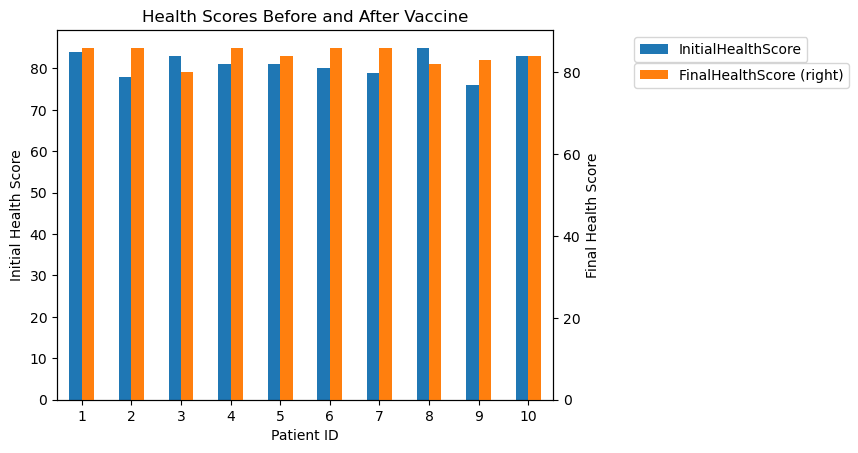

In [83]:
import matplotlib.pyplot as plt

health_scores = vaccine_df[:][['InitialHealthScore', 'FinalHealthScore']]

ax = health_scores.plot(kind= 'bar' , secondary_y= 'FinalHealthScore' , rot= 0 )
plt.title("Health Scores Before and After Vaccine")
ax.set_xlabel('Patient ID')
ax.set_ylabel('Initial Health Score')
ax.right_ax.set_ylabel('Final Health Score')
ax.legend(loc='upper left', bbox_to_anchor=(1.15,1))
ax.right_ax.legend(loc='upper left', bbox_to_anchor=(1.15,0.93))

ax.set_xticks(range(len(health_scores)))
ax.set_xticklabels(range(1, len(health_scores) + 1))

plt.show()

>I've taken the InitialHealthScore and FinalHealthScore columns from the dataset to assess them side by side per person. This makes it easier to see if the consumer's health score increased or decreased compared to before they took the vaccine. From this, we can tell that a majority of patients improved either significantly or insignificantly after the vaccine, but nevertheless improved.

In [85]:
vaccine_df.describe()

,PatientID,Age,InitialHealthScore,FinalHealthScore
count,10.00000,10.00000,10.000000,10.000000
mean,5.50000,38.40000,81.000000,84.300000
std,3.02765,8.30261,2.828427,2.110819
min,1.00000,26.00000,76.000000,80.000000
25%,3.25000,33.25000,79.250000,83.250000
50%,5.50000,38.00000,81.000000,85.000000
75%,7.75000,44.00000,83.000000,86.000000
max,10.00000,52.00000,85.000000,86.000000


> I am looking at the summary statistics for the original dataset to get an idea of the numbers that lie behind the data

In [81]:
import numpy as np

n = (vaccine_df.InitialHealthScore).sum()
bootstrap_samples = 1000
bootstrapped = np.zeros(bootstrap_samples)
for i in range(bootstrap_samples):
    simulated_sample = vaccine_df.sample(n=n, replace=True).InitialHealthScore
    bootstrapped[i] = simulated_sample.mean()

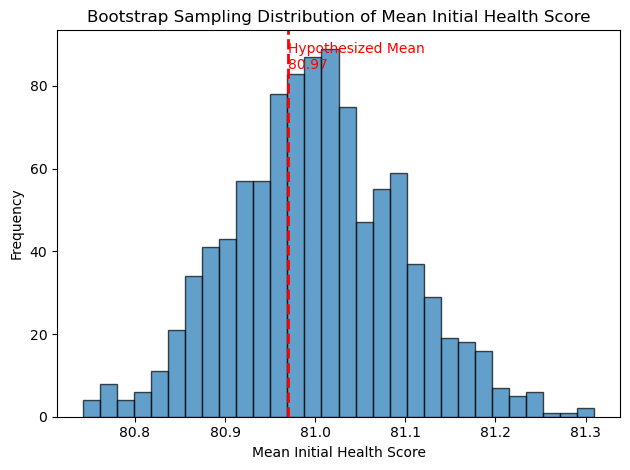

In [109]:
import numpy as np
import matplotlib.pyplot as plt

hypothesized_mean = 80.97

# Create the histogram of the bootstrap sampling distribution
plt.hist(bootstrapped, bins=30, edgecolor='k', alpha=0.7)

# Add a vertical line for the hypothesized mean
plt.axvline(hypothesized_mean, color='red', linestyle='dashed', linewidth=2)

# Annotate the hypothesized mean on the graph
plt.text(hypothesized_mean, plt.ylim()[1] * 0.9, f'Hypothesized Mean\n{hypothesized_mean}', color='red')

# Add labels and title
plt.xlabel('Mean Initial Health Score')
plt.ylabel('Frequency')
plt.title('Bootstrap Sampling Distribution of Mean Initial Health Score')

plt.tight_layout()
plt.show()

> This shows the initial health scores if the experiment was done 1000 times. We can see that the health scores fluctuate but a majority of them stay around the hypothesized mean which is approximately 81

In [80]:
n2 = (vaccine_df.FinalHealthScore).sum()
bootstrap_samples2 = 1000
bootstrapped2 = np.zeros(bootstrap_samples)
for i in range(bootstrap_samples2):
    simulated_sample2 = vaccine_df.sample(n=n, replace=True).FinalHealthScore
    bootstrapped2[i] = simulated_sample2.mean()

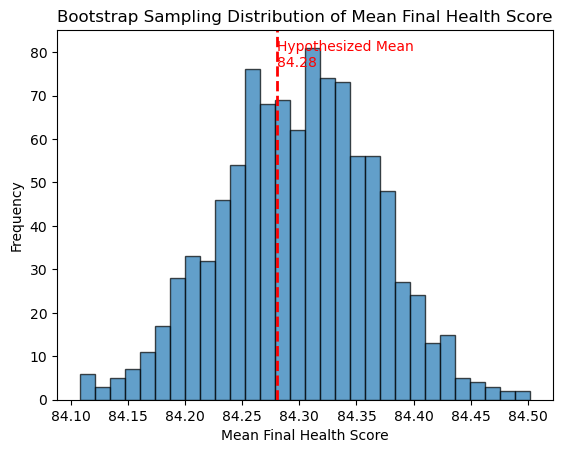

In [108]:
hypothesized_mean = 84.28

# Create the histogram of the bootstrap sampling distribution
plt.hist(bootstrapped2, bins=30, edgecolor='k', alpha=0.7)

# Add a vertical line for the hypothesized mean
plt.axvline(hypothesized_mean, color='red', linestyle='dashed', linewidth=2)

# Annotate the hypothesized mean on the graph
plt.text(hypothesized_mean, plt.ylim()[1] * 0.9, f'Hypothesized Mean\n{hypothesized_mean}', color='red')

# Add labels and title
plt.xlabel('Mean Final Health Score')
plt.ylabel('Frequency')
plt.title('Bootstrap Sampling Distribution of Mean Final Health Score')

plt.show()

> This shows the bootstrapped sampling distribution of means for the final health score. The means in this graph are more spread out than the initial health score but many of the values stay around 84.2 and 84.35.

I used bootstrapping because there is only 10 people who've taken the vaccine, but that is not enough to prove if the vaccine is working and it may take a long time and a heavy use of resources to create more vaccines that may potentially be ineffective. Instead of wasting resources on the potential that the vaccine is ineffective, I used bootstrapping on the existing 10 consumers to simulate doing the experiment multiple times but without the issue of money arising. 

In [105]:
np.quantile(bootstrapped,[0.025,0.975])

array([80.82459877, 81.19259259])

In [106]:
np.quantile(bootstrapped2,[0.025,0.975])

array([84.16533951, 84.42595679])

>*np.quantile* allows me to calculate the 2.5th and 97.5th quantile to calculate the 95% confidence interval in which I can inform a hypothesized mean from. 

In [121]:
# Initial and final health score means (before bootstrapping)
health_scores.mean()

InitialHealthScore    81.0
FinalHealthScore      84.3
dtype: float64

In [120]:
# Bootstrapped initial health score mean
bootstrapped.mean()

81.00112716049384

In [119]:
# Bootstrapped final health score mean
bootstrapped2.mean()

84.29869876543209

> By calculating the mean of the original dataset and the bootstrapped dataset, I can tell that the variability/uncertainty of the mean is close to none, or that the distribution of the mean is almost identical, as the bootstrapped means are very close to the population/sample mean.

After viewing the original dataset and it's summary statistics, bootstrapping the data to see if more samples would change the results, and visualizing the bootstrapped data, I can conclude that even with more samples, the vaccine seems to be effective as on average, the health score increases by approximately 3. That would mean what AliTech is doing with the vaccine is working, and they can continue with what they've been doing with the vaccine because if it's improving the consumer's health, then what they're doing must be correct. Although something to note is that even if their vaccine seems to be working on 10 people and improving health scores on the bootstrapped dataset, the increase in health score stays the same even with 1000 samples which leads me to a future consideration. The vaccine is moderately good so far, but if even with more samples the increase stays the same, the vaccine won't be as effective because human bodies get used to it. We want the bootstapped data to have a higher health value increase so that the vaccine is always improving in the long run.

Therefore, we can reject the null hypothesis of "no effect" because there are no zeroes in the bootstrap dataset used to create the interval. We can also see that the population mean and the bootstrapped means don't change much and are very similar to each other, meaning that even with more samples, the results of the improved health scores stay the same. 

## Question 9 
No

## ChatBot Links and Summaries
### Question 1
(https://chatgpt.com/share/66fe1a97-7604-8002-a792-5904e02f06ec)

Here's a summary of our conversation:

1. **Standard Deviation (STD):** Measures the variability or spread of individual data points in a dataset around the mean. It describes how much the data points differ from the mean, providing insight into the dispersion of the dataset.
   
2. **Standard Error of the Mean (SEM):** Measures the variability of sample means and reflects how much the sample mean is expected to fluctuate around the true population mean. It shows how accurate the sample mean is as an estimate of the population mean, decreasing as the sample size increases.

3. **Bootstrapping and SEM:** In bootstrapping, you resample the original dataset with replacement multiple times to create bootstrapped samples. You compute the mean for each sample, and the standard deviation of these bootstrapped means is an estimate of the SEM, which tells you how much the sample means vary from the original mean.

4. **Key Differences:**
   - **STD** captures the spread of individual data points in the dataset.
   - **SEM** captures the spread of sample means, representing the precision of the sample mean as an estimate of the population mean.

In short, STD is about variability in the data itself, while SEM is about the accuracy and consistency of the sample mean as an estimator for the population mean.

### Question 2-3
(https://chatgpt.com/share/66fe267e-3818-8002-aad0-3f0d51975a97)

Here's a summary of our chat:

- **Confidence Interval**: A range that estimates a population parameter, with a certain level of confidence (like 95%). A **95% confidence interval** means that if we took many samples, 95% of the intervals would contain the true population mean.

- **Formula for a 95% Confidence Interval**: 
   \[
   \text{Confidence Interval} = \text{sample mean} \pm (1.96 \times \text{SEM})
   \]
   - The **sample mean** is the average of your sample.
   - **Z** is 1.96 for 95% confidence.
   - **Standard Error of the Mean (SEM)** is calculated by dividing the sample standard deviation by the square root of the sample size.
   - The result is an interval that estimates where the true population mean lies.

- **Bootstrapped Confidence Interval**:
   - In bootstrapping, resampling with replacement is done many times to generate a distribution of sample means.
   - For a 95% bootstrapped confidence interval, the **2.5th and 97.5th percentiles** of the bootstrapped means are taken as the **lower** and **upper bounds** of the interval, without needing to calculate the standard error of the means.

This chat explained both the formula-based method using the SEM and the percentile-based method using bootstrapping to create confidence intervals.

### Question 4
(https://chatgpt.com/share/66fe32c2-5f08-800e-b060-d0b5d6380b82)

Here's a summary of our chat session:

1. **Bootstrap Confidence Interval for Population Mean**:
   - You requested code to calculate a 95% bootstrap confidence interval for a population mean. I provided Python code that:
     - Uses bootstrapping to generate many resamples of the given sample.
     - Calculates the mean of each resample.
     - Computes the percentiles (2.5th and 97.5th) to form the 95% confidence interval.

2. **Modification for Other Parameters (e.g., Median)**:
   - I explained how the code could be modified to calculate a confidence interval for different population parameters, like the **median**. The key modification is replacing `np.mean()` with `np.median()` to calculate the desired statistic for each resample.

3. **Detailed Code Breakdown**:
   - I explained each step of the code:
     1. **Importing libraries**: We use `numpy` to handle the resampling and statistical calculations.
     2. **Function definition**: The function takes the sample, the number of bootstrap resamples, and the confidence level as inputs.
     3. **Bootstrapping process**: We generate resamples using `np.random.choice(sample, size=len(sample), replace=True)` and compute the mean or median for each resample.
     4. **Percentile calculation**: We calculate the lower and upper percentiles using the confidence level to generate the confidence interval.
  
4. **Clarification on `size=len(sample)`**:
   - I explained that `size=len(sample)` in `np.random.choice()` specifies the size of each bootstrap sample. It generates a new resample of the same size as the original sample, with replacement.

5. **Use of `confidence_level` in Step 4**:
   - I clarified how the `confidence_level` is defined in the function signature and used later to calculate the lower and upper percentiles for the confidence interval.
   
### Question 5-7
(https://chatgpt.com/share/66ff34c0-9810-8002-a7d0-1dd7ca01dfbb)

In this session, we discussed several statistical concepts related to hypothesis testing and bootstrapping:

1. **Confidence Intervals and the Null Hypothesis**: 
   - When a confidence interval includes zero, it suggests that zero (no effect or no difference) could be the true value, so we "fail to reject the null hypothesis."
   - If the confidence interval doesn't include zero, zero is ruled out, and we can reject the null hypothesis, indicating a likely effect or difference.

2. **Bootstrapping**: 
   - You can use bootstrapping on a sample of size \(n\) from a population to estimate variability in sample statistics and generate confidence intervals, even if the population data is known. Bootstrapping helps simulate the variability you might see in repeated sampling.
   - It’s a flexible, non-parametric technique that doesn’t rely on strong distributional assumptions and is especially useful when sample sizes are small or assumptions like normality aren’t met.
   
### Question 8
(https://chatgpt.com/share/66ff60cb-0eb4-800e-be60-ebccd3777f7a)

Here's a summary of our chat session:

1. **Plotting with Matplotlib**:
   - You wanted to customize a bar plot by moving the legend outside the graph and adding labels such as the title, subtitle, and axis labels. We used `bbox_to_anchor` to place the legend outside and added titles, axis labels, and formatting options.
   
2. **Bootstrapping Explained**:
   - We discussed a bootstrapping code where resampling was done from a DataFrame. We examined how the code fits a gamma distribution to resampled data and stores the parameters (`a`, `loc`, `scale`), along with calculating the sample mean for each bootstrap sample.

3. **Hypothesized Mean**:
   - We explained the concept of a hypothesized mean, which is an assumed population mean under a null hypothesis. You can use hypothesis testing (like a t-test) to compare your sample mean with the hypothesized mean and determine if the observed difference is statistically significant.

4. **Null Hypothesis and Bootstrapping**:
   - We clarified that the null hypothesis of no effect does not mean the bootstrapped means should match the original mean. Bootstrapping is used to estimate the variability of a sample statistic, not necessarily to test the difference between the original and bootstrapped means.

5. **Interpreting Hypothesis Testing**:
   - If your sample mean is close to your hypothesized mean, and the statistical test results in a high p-value, you would **fail to reject** the null hypothesis. This indicates no significant difference between the sample and the hypothesized population mean.